<a href="https://colab.research.google.com/github/Malikumair786/Final-Year-Project-Leukemia-Detectio-System/blob/main/Leukemia_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#OpenCV
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
# Now importing the deep learning libraries that we need 
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
# from google.colab import drive
from tensorflow.keras import layers, models
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import random
# Set path to the two folders containing Leukemic and healthy images respectively
leukemic_folder_path = '/content/drive/MyDrive/Datasets/C-NMC_Leukemia/training_data/fold_0/all'
healthy_folder_path = '/content/drive/MyDrive/Datasets/C-NMC_Leukemia/training_data/fold_0/hem'

# Get list of all image filenames in each folder
leukemic_filenames = os.listdir(leukemic_folder_path)
healthy_filenames = os.listdir(healthy_folder_path)
# Load images and labels
import random

# Find the minimum number of images in either class
num_images = min(len(healthy_filenames), len(leukemic_filenames))
healthy_images = random.sample(healthy_filenames, num_images)
leukemic_images = random.sample(leukemic_filenames, num_images)
# Randomly sample a subset of the larger class
if len(leukemic_filenames) > num_images:
    leukemic_images = random.sample(leukemic_filenames, num_images)
if len(healthy_filenames) > num_images:
    healthy_images = random.sample(healthy_filenames, num_images)

# Check the new sizes of the image arrays
print('Number of leukemic images:', len(leukemic_images))
print('Number of healthy images:', len(healthy_images))
# Load images and labels
images = []
labels = []


Number of leukemic images: 1130
Number of healthy images: 1130


In [ ]:
for filename in leukemic_images:
    if filename.endswith('.bmp'):
        image = cv2.imread(os.path.join(leukemic_folder_path, filename))
        # Resize the image to (256,256)
        image = cv2.resize(image, (256, 256))
        print(f"Image shape: {image.shape}, dtype: {image.dtype}")
        images.append(image)
        labels.append(0)  # 0 represents Leukemia


Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (25

In [ ]:
# for filename in leukemic_images:
#     if filename.endswith('.bmp'):
#         image = cv2.imread(os.path.join(leukemic_folder_path, filename))
#         print(f"Image shape: {image.shape}, dtype: {image.dtype}")
#         images.append(image)
#         labels.append(0)  # 0 represents Leukemia

In [ ]:
for filename in healthy_images:
    if filename.endswith('.bmp'):
        image = cv2.imread(os.path.join(healthy_folder_path, filename))
        resized_image = cv2.resize(image, (256, 256))  # resize to 256x256
        print(f"Image shape: {resized_image.shape}, dtype: {resized_image.dtype}")
        images.append(resized_image)
        labels.append(1)  # 1 represents healthy cells

Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (256, 256, 3), dtype: uint8
Image shape: (25

In [ ]:
# for filename in healthy_images:
#     if filename.endswith('.bmp'):
#         image = cv2.imread(os.path.join(healthy_folder_path, filename))
#         print(f"Image shape: {image.shape}, dtype: {image.dtype}")
#         images.append(image)
#         labels.append(1)  # 1 represents healthy cells

In [ ]:
# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Check the new sizes of the image arrays
print('Number of healthy images:', len(healthy_images))
print('Number of leukemic images:', len(leukemic_images))

Number of healthy images: 1130
Number of leukemic images: 1130


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [ ]:
# Normalize images
images = images.astype('float32') / 255.0

In [ ]:
# import random
# import matplotlib.pyplot as plt

# # randomly select 3 indices from the images array
# indices = random.sample(range(len(images)), 3)

# # display the selected images
# fig, ax = plt.subplots(1, 3, figsize=(10,10))
# for i, idx in enumerate(indices):
#     ax[i].imshow(images[idx])
#     ax[i].set_title(f"Image {i+1}")
#     ax[i].axis('off')
# plt.show()


In [ ]:
# import random
# import matplotlib.pyplot as plt

# # Choose 3 random indices
# indices = random.sample(range(len(images)), 3)

# # Plot the images
# for i, index in enumerate(indices):
#     plt.subplot(1, 3, i+1)
#     plt.imshow(images[index])
#     plt.axis('off')
    
# plt.show()


In [ ]:
print(X_train.shape)

(1808, 256, 256, 3)


In [ ]:
model = Sequential()
# Add a resizing layer to resize input images to (64, 64)
model.add(Resizing(64, 64))

# Add the rest of your model layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
57/57 [==============================] - 2s 14ms/step - loss: 2.7619 - accuracy: 0.7240 - val_loss: 0.4743 - val_accuracy: 0.7965
Epoch 2/10
57/57 [==============================] - 1s 11ms/step - loss: 0.4474 - accuracy: 0.7965 - val_loss: 0.4754 - val_accuracy: 0.7987
Epoch 3/10
57/57 [==============================] - 1s 11ms/step - loss: 0.3803 - accuracy: 0.8291 - val_loss: 0.4881 - val_accuracy: 0.8230
Epoch 4/10
57/57 [==============================] - 1s 13ms/step - loss: 0.3521 - accuracy: 0.8374 - val_loss: 0.4868 - val_accuracy: 0.7810
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.2839 - accuracy: 0.8778 - val_loss: 0.5238 - val_accuracy: 0.7788
Epoch 6/10
57/57 [==============================] - 1s 13ms/step - loss: 0.2366 - accuracy: 0.9038 - val_loss: 0.5330 - val_accuracy: 0.7743
Epoch 7/10
57/57 [==============================] - 1s 13ms/step - loss: 0.2008 - accuracy: 0.9215 - val_loss: 0.5960 - val_accuracy: 0.8009
Epoch 8/10
57

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


15/15 [==============================] - 0s 7ms/step - loss: 0.6645 - accuracy: 0.7765
Test loss: 0.6645411849021912
Test accuracy: 0.7765486836433411


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the test accuracy manually
test_acc = (y_pred.round() == y_test).mean()

# Print the test accuracy
print('Test accuracy:', test_acc)


15/15 [==============================] - 0s 5ms/step
Test accuracy: 0.49735687994361344


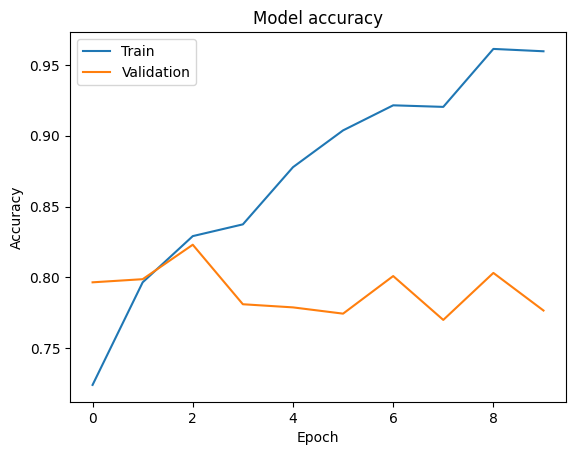

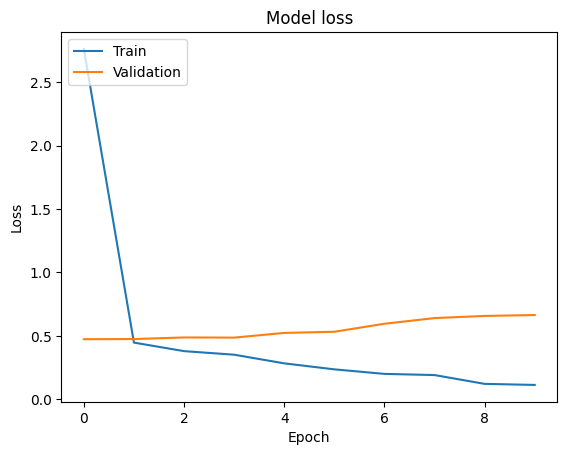

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)


15/15 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.7544
Test accuracy: 0.7544247508049011


In [ ]:
import cv2
import numpy as np

# Load the new image
new_image = cv2.imread('h1.bmp')


# Resize the new image to (64, 64)
new_image = cv2.resize(new_image, (64, 64))

# Convert the image to a numpy array and normalize the pixel values
new_image = np.array(new_image, dtype=np.float32) / 255.0

# Reshape the image to (1, 64, 64, 3) to match the input shape of the model
new_image = np.reshape(new_image, (1, 64, 64, 3))

# Use the trained model to predict the class of the new image
class_probabilities = model.predict(new_image)

# The predicted class is the class with the highest probability
predicted_class = np.argmax(class_probabilities)

if predicted_class > 0.5:
    print("Predicted label: Healthy")
else:
    print("Predicted label: Leukemia")

1/1 [==============================] - 0s 27ms/step
Predicted label: Leukemia


In [ ]:
import cv2
import numpy as np

# Load the new image
new_image = cv2.imread('h2.bmp')


# Resize the new image to (64, 64)
new_image = cv2.resize(new_image, (64, 64))

# Convert the image to a numpy array and normalize the pixel values
new_image = np.array(new_image, dtype=np.float32) / 255.0

# Reshape the image to (1, 64, 64, 3) to match the input shape of the model
new_image = np.reshape(new_image, (1, 64, 64, 3))

# Use the trained model to predict the class of the new image
class_probabilities = model.predict(new_image)

# The predicted class is the class with the highest probability
predicted_class = np.argmax(class_probabilities)

if predicted_class > 0.5:
    print("Predicted label: Healthy")
else:
    print("Predicted label: Leukemia")

1/1 [==============================] - 0s 34ms/step
Predicted label: Leukemia


In [ ]:
import cv2
import numpy as np

# Load the new image
new_image = cv2.imread('h3.bmp')


# Resize the new image to (64, 64)
new_image = cv2.resize(new_image, (64, 64))

# Convert the image to a numpy array and normalize the pixel values
new_image = np.array(new_image, dtype=np.float32) / 255.0

# Reshape the image to (1, 64, 64, 3) to match the input shape of the model
new_image = np.reshape(new_image, (1, 64, 64, 3))

# Use the trained model to predict the class of the new image
class_probabilities = model.predict(new_image)

# The predicted class is the class with the highest probability
predicted_class = np.argmax(class_probabilities)

if predicted_class > 0.5:
    print("Predicted label: Healthy")
else:
    print("Predicted label: Leukemia")

1/1 [==============================] - 0s 23ms/step
Predicted label: Leukemia


In [ ]:
import cv2
import numpy as np

# Load the new image
new_image = cv2.imread('h4.bmp')


# Resize the new image to (64, 64)
new_image = cv2.resize(new_image, (64, 64))

# Convert the image to a numpy array and normalize the pixel values
new_image = np.array(new_image, dtype=np.float32) / 255.0

# Reshape the image to (1, 64, 64, 3) to match the input shape of the model
new_image = np.reshape(new_image, (1, 64, 64, 3))

# Use the trained model to predict the class of the new image
class_probabilities = model.predict(new_image)

# The predicted class is the class with the highest probability
predicted_class = np.argmax(class_probabilities)

if predicted_class > 0.5:
    print("Predicted label: Healthy")
else:
    print("Predicted label: Leukemia")

1/1 [==============================] - 0s 26ms/step
Predicted label: Leukemia


In [ ]:
import cv2
import numpy as np

# Load the new image
new_image = cv2.imread('all4.bmp')


# Resize the new image to (64, 64)
new_image = cv2.resize(new_image, (64, 64))

# Convert the image to a numpy array and normalize the pixel values
new_image = np.array(new_image, dtype=np.float32) / 255.0

# Reshape the image to (1, 64, 64, 3) to match the input shape of the model
new_image = np.reshape(new_image, (1, 64, 64, 3))

# Use the trained model to predict the class of the new image
class_probabilities = model.predict(new_image)

# The predicted class is the class with the highest probability
predicted_class = np.argmax(class_probabilities)

if predicted_class > 0.5:
    print("Predicted label: Healthy")
else:
    print("Predicted label: Leukemia")

1/1 [==============================] - 0s 19ms/step
Predicted label: Leukemia


In [ ]:
import cv2
import numpy as np

# Load the new image
new_image = cv2.imread('all1.bmp')


# Resize the new image to (64, 64)
new_image = cv2.resize(new_image, (64, 64))

# Convert the image to a numpy array and normalize the pixel values
new_image = np.array(new_image, dtype=np.float32) / 255.0

# Reshape the image to (1, 64, 64, 3) to match the input shape of the model
new_image = np.reshape(new_image, (1, 64, 64, 3))

# Use the trained model to predict the class of the new image
class_probabilities = model.predict(new_image)

# The predicted class is the class with the highest probability
predicted_class = np.argmax(class_probabilities)

if predicted_class > 0.5:
    print("Predicted label: Healthy")
else:
    print("Predicted label: Leukemia")

1/1 [==============================] - 0s 18ms/step
Predicted label: Leukemia
